# Laboratorium 0 - Wstęp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_wine, fetch_openml
from ucimlrepo import fetch_ucirepo  # do datasetu glass (https://archive.ics.uci.edu/dataset/42/glass+identification)

## Iris dataset

In [2]:
iris = load_iris()
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris['class_name'] = iris.target_names[iris.target] # nazwa gatunku dla każdej instancji (przyda się przy wykresie)

df_iris.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_name
0,5.1,3.5,1.4,0.2,setosa


In [3]:
# Klasy - 3 różne gatunki irysów
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Atrybuty - 4 cechy charakteryzujące irysy (długość/szerokość działki kielicha, długość/szerokość płatka) 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Instancje - 150 zaobserwowanych kwiatów, każdy opisany przez atrybuty i klasę
len(iris.data)

150

In [6]:
# Dystrybucja klas w zbiorze
class_labels = iris.target
unique_classes, counts = np.unique(class_labels, return_counts = True)

for i, class_name in enumerate(iris.target_names):
    print(f'{class_name}: {counts[i]}')

setosa: 50
versicolor: 50
virginica: 50


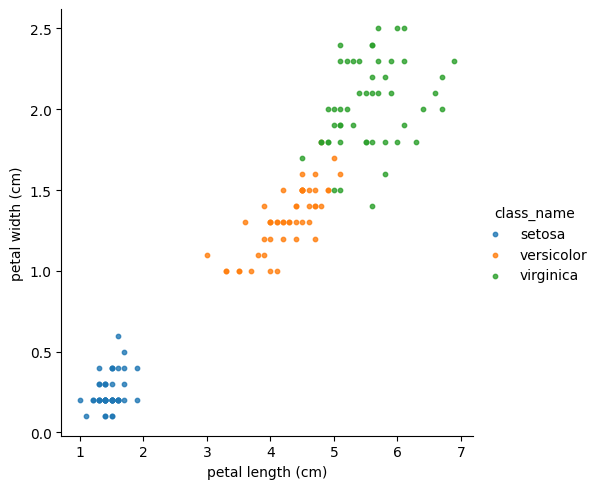

In [7]:
# Wykres 1
sns.lmplot(data = df_iris
           , x = 'petal length (cm)'
           , y = 'petal width (cm)'
           , hue = 'class_name'
           , fit_reg = False
           , scatter_kws = {'s' : 10}
           )
plt.show()

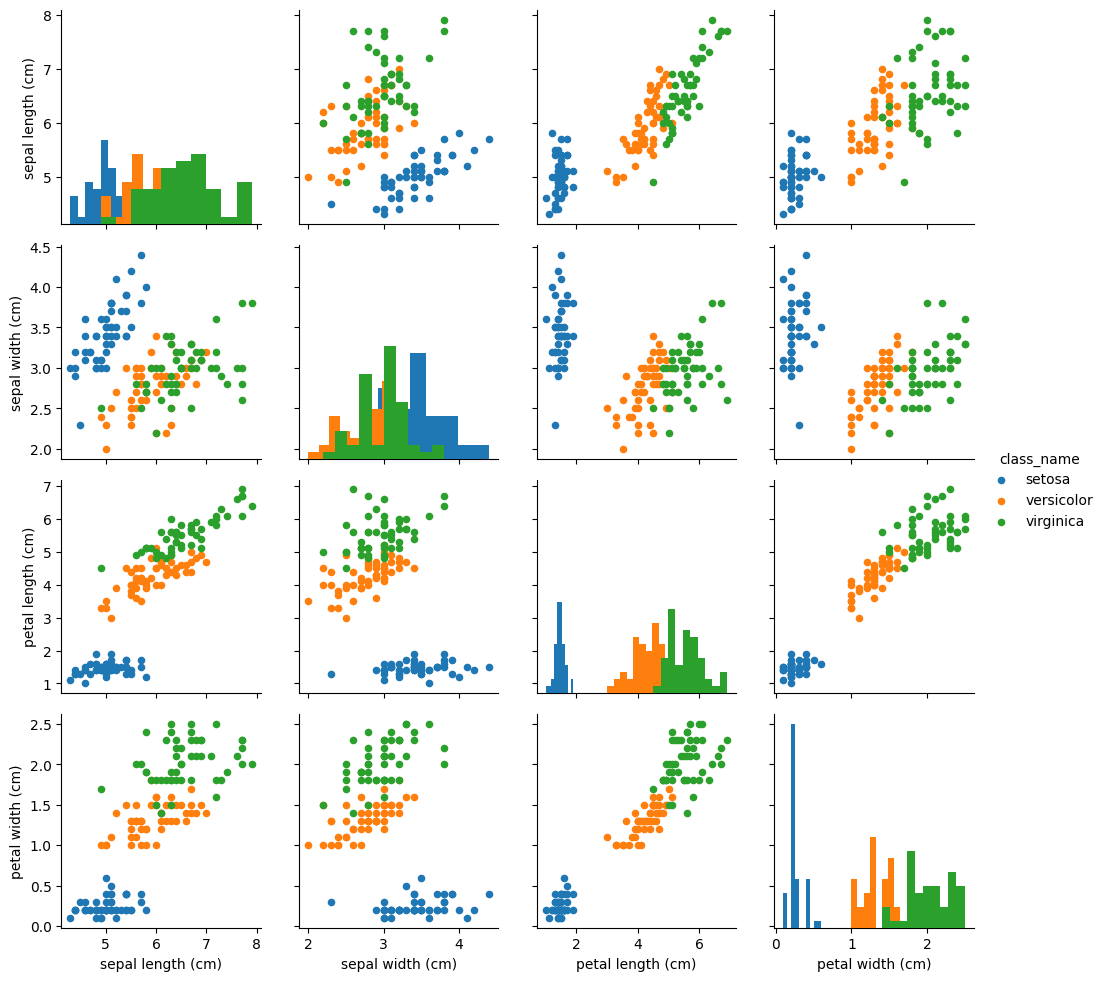

In [27]:
# Rozkład danych - wykres 2
scatter_kws = {'s' : 20}
hist_kws = {'bins' : 10}

graph_iris = sns.PairGrid(data = df_iris, hue = 'class_name')
graph_iris = graph_iris.map_offdiag(plt.scatter, **scatter_kws)
graph_iris = graph_iris.map_diag(plt.hist, **hist_kws)
graph_iris = graph_iris.add_legend()
plt.show()

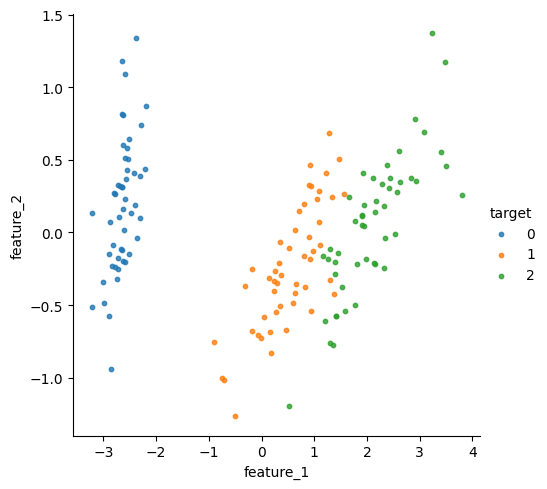

In [20]:
# PCA
X = iris.data
y = iris.target

pca = PCA(n_components = 2)
pca_X = pca.fit_transform(X)

df_iris_pca = pd.concat([pd.DataFrame(pca_X, columns = ['feature_1', 'feature_2'])\
                         , pd.DataFrame(y, columns = ['target'])], axis = 1)

# Wykres
sns.lmplot(data = df_iris_pca
           , x = 'feature_1'
           , y = 'feature_2'
           , hue = 'target'
           , fit_reg = False
           , scatter_kws = {'s' : 10}
           )
plt.show()

## Wine dataset

In [29]:
wine = load_wine()
df_wine = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df_wine['class_name'] = wine.target_names[wine.target]

df_wine.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_name
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0


In [30]:
# Klasy - 3 klasy wina
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [31]:
# Atrybuty - 13 cech charakteryzujących wino 
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
# Instancje - 178 obserwacji
len(wine.data)

178

In [33]:
# Dystrybucja klas w zbiorze
class_labels = wine.target
unique_classes, counts = np.unique(class_labels, return_counts = True)

for i, class_name in enumerate(wine.target_names):
    print(f'{class_name}: {counts[i]}')

class_0: 59
class_1: 71
class_2: 48


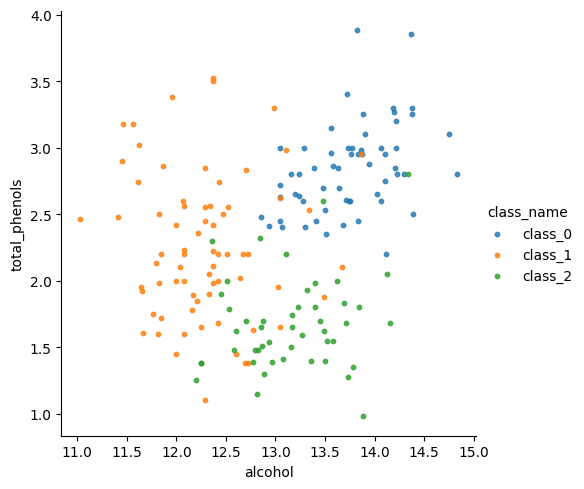

In [34]:
# Wykres 1
sns.lmplot(data = df_wine
           , x = 'alcohol'
           , y = 'total_phenols'
           , hue = 'class_name'
           , fit_reg = False
           , scatter_kws = {'s' : 10}
           )
plt.show()

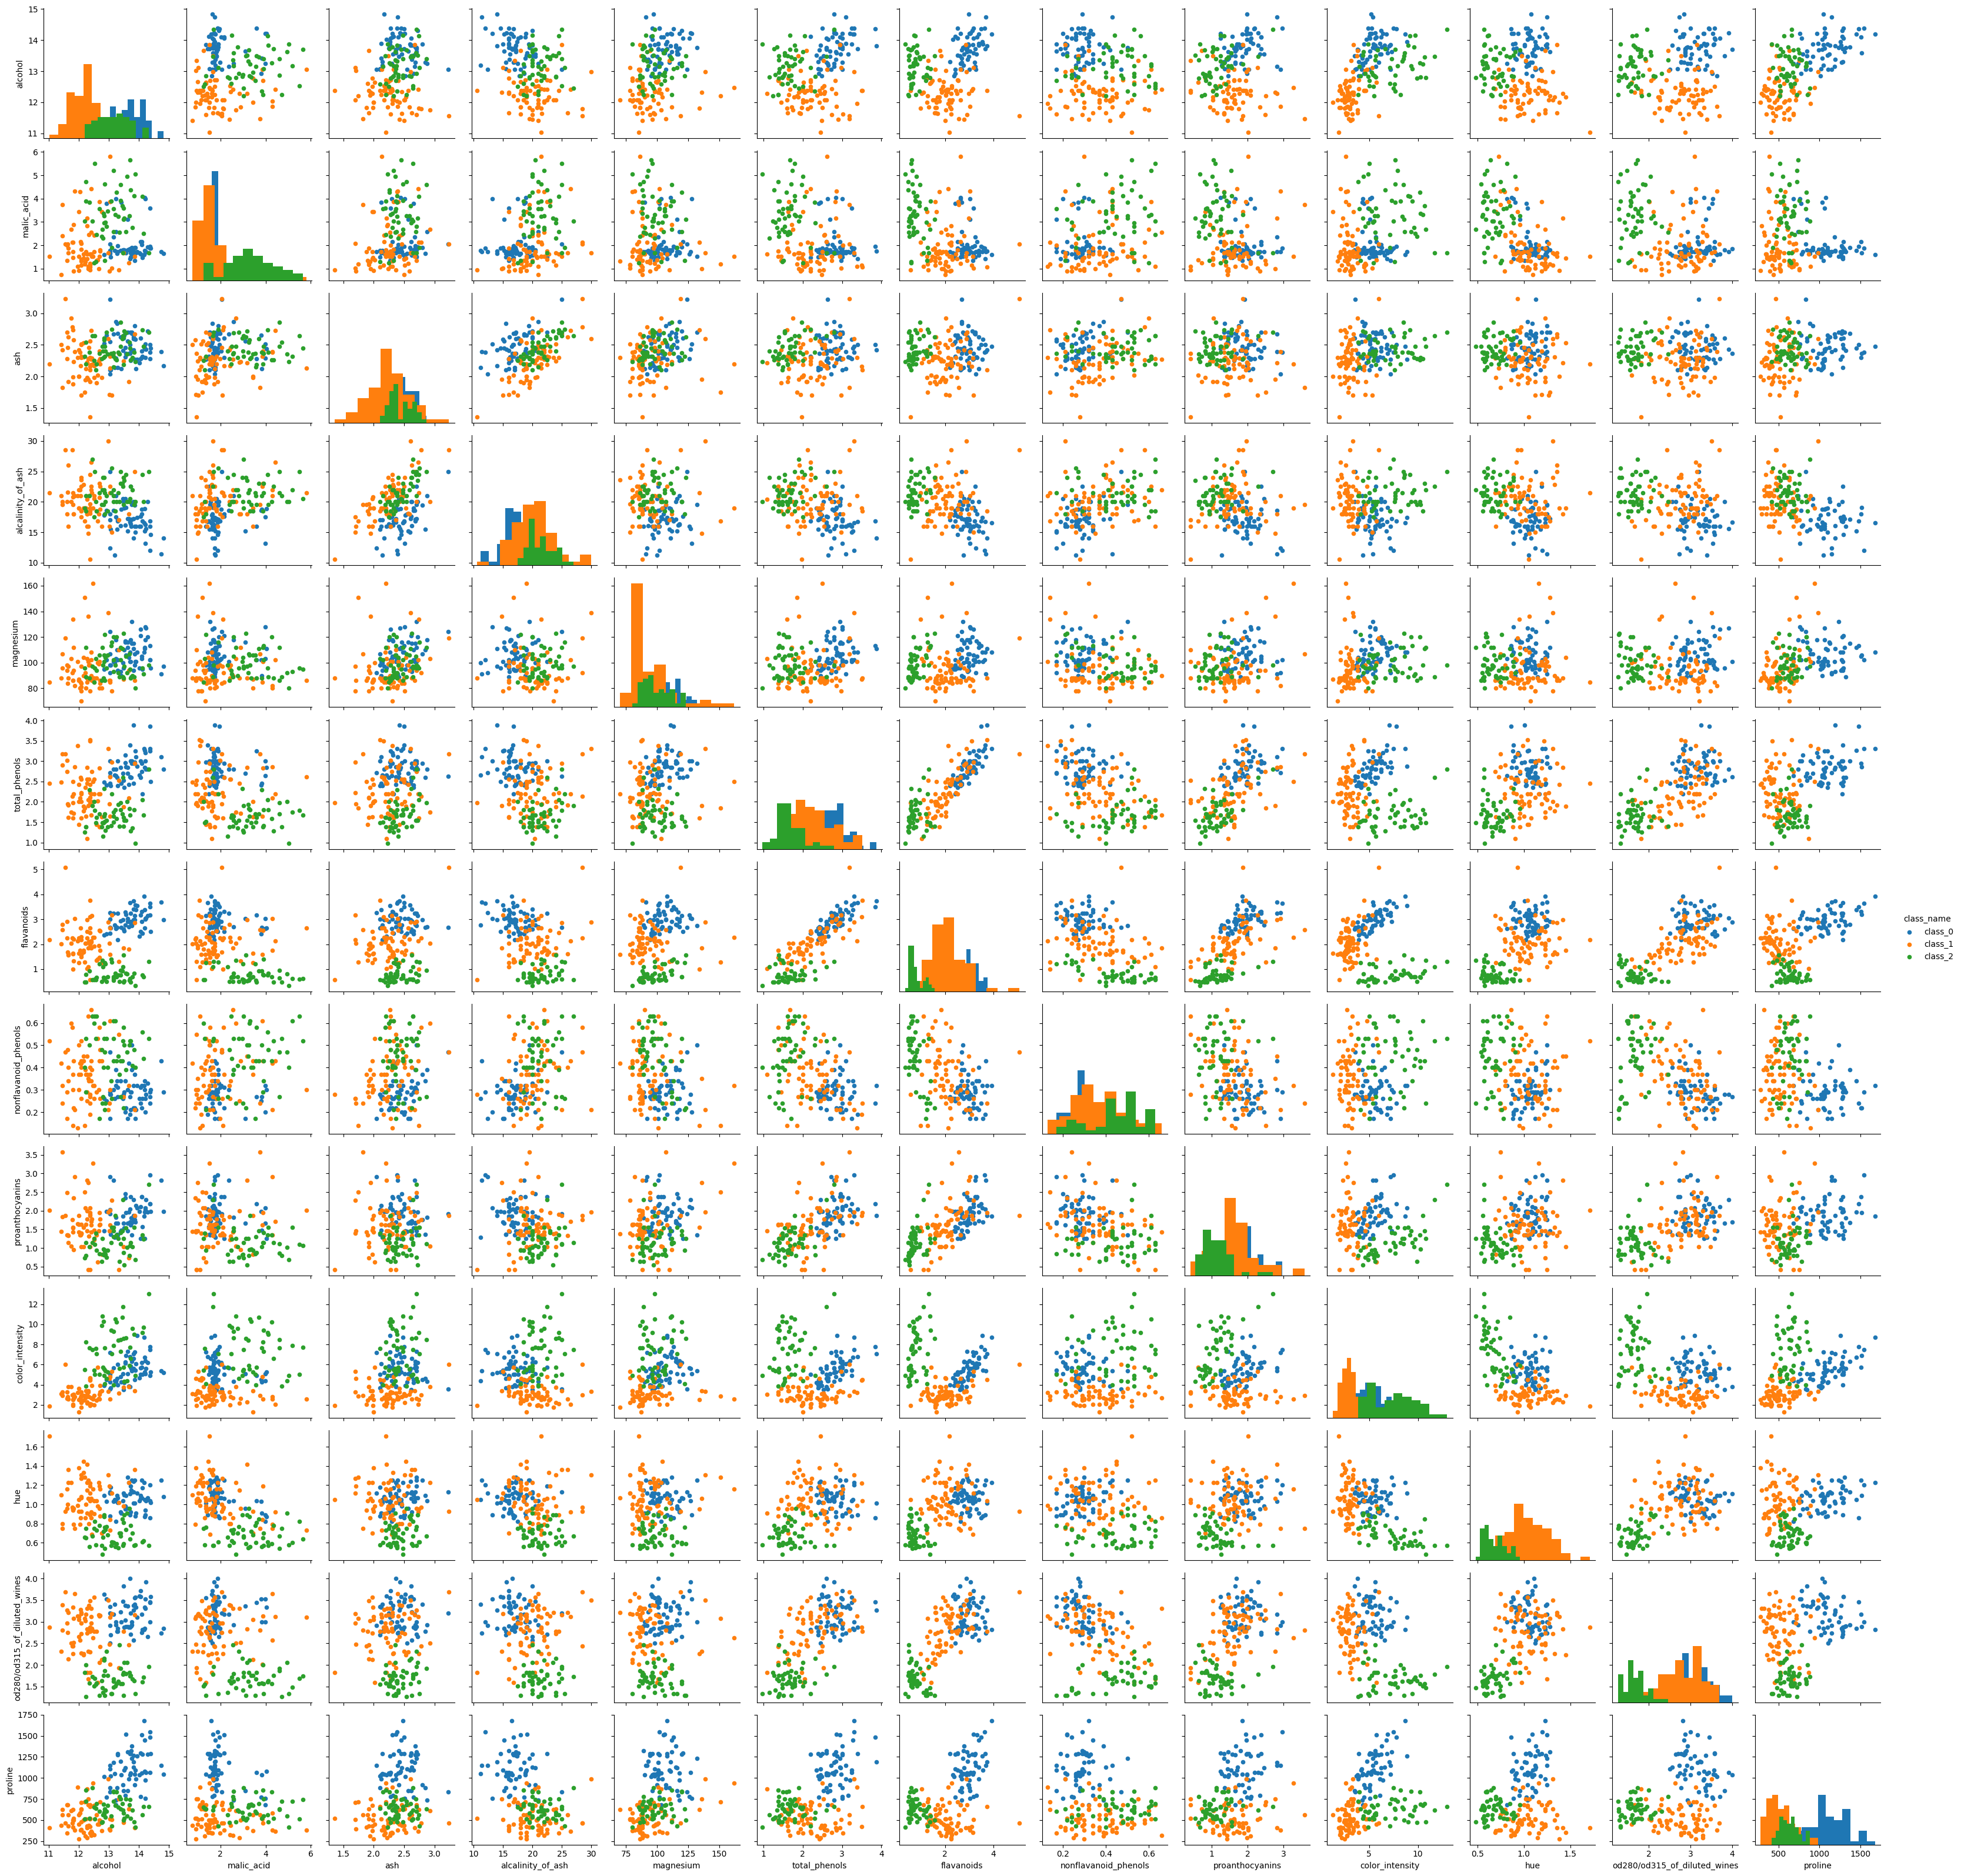

In [35]:
# Rozkład danych - wykres 2
scatter_kws = {'s' : 20}
hist_kws = {'bins' : 10}

graph_wine = sns.PairGrid(data = df_wine, hue = 'class_name')
graph_wine = graph_wine.map_offdiag(plt.scatter, **scatter_kws)
graph_wine = graph_wine.map_diag(plt.hist, **hist_kws)
graph_wine = graph_wine.add_legend()
plt.show()

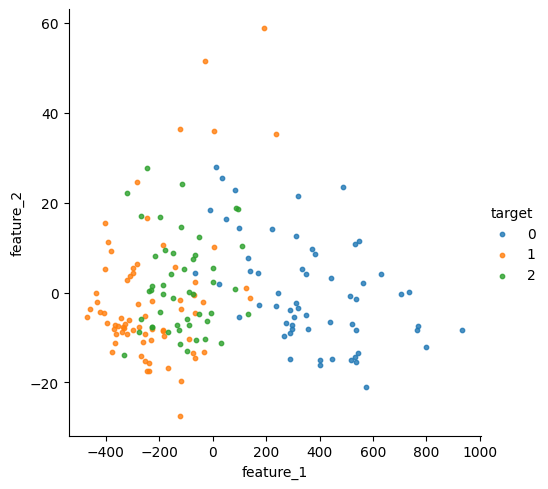

In [56]:
# PCA
X = wine.data
y = wine.target

pca = PCA(n_components = 2)
pca_X = pca.fit_transform(X)

df_wine_pca = pd.concat([pd.DataFrame(pca_X, columns = ['feature_1', 'feature_2'])\
                         , pd.DataFrame(y, columns = ['target'])], axis = 1)

# Wykres
sns.lmplot(data = df_wine_pca
           , x = 'feature_1'
           , y = 'feature_2'
           , hue = 'target'
           , fit_reg = False
           , scatter_kws = {'s' : 10}
           )
plt.show()

## Glass dataset

In [37]:
glass_identification = fetch_ucirepo(id=42) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
df_glass = pd.concat([X, y], axis = 1)
df_glass.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [38]:
# Klasy - 7 klas
glass_labels = np.unique(y)
glass_labels

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [39]:
# Atrybuty - 9 cech
glass_features = list(X.columns)
glass_features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [40]:
# Instancje - 214 obserwacji
glass_length = len(df_glass)
glass_length

214

In [41]:
# Dystrybucja klas w zbiorze
class_labels = y
unique_classes, counts = np.unique(class_labels, return_counts = True)

for i, class_name in enumerate(glass_labels):
    print(f'{class_name}: {counts[i]}')

1: 70
2: 76
3: 17
5: 13
6: 9
7: 29


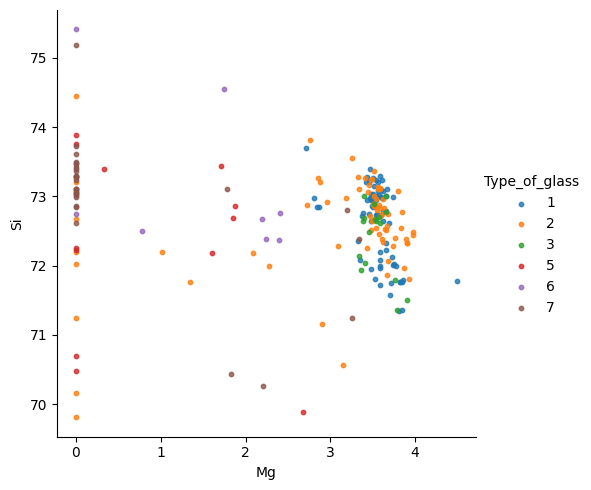

In [42]:
# Wykres 1
sns.lmplot(data = df_glass
           , x = 'Mg'
           , y = 'Si'
           , hue = 'Type_of_glass'
           , fit_reg = False
           , scatter_kws = {'s' : 10}
           )
plt.show()

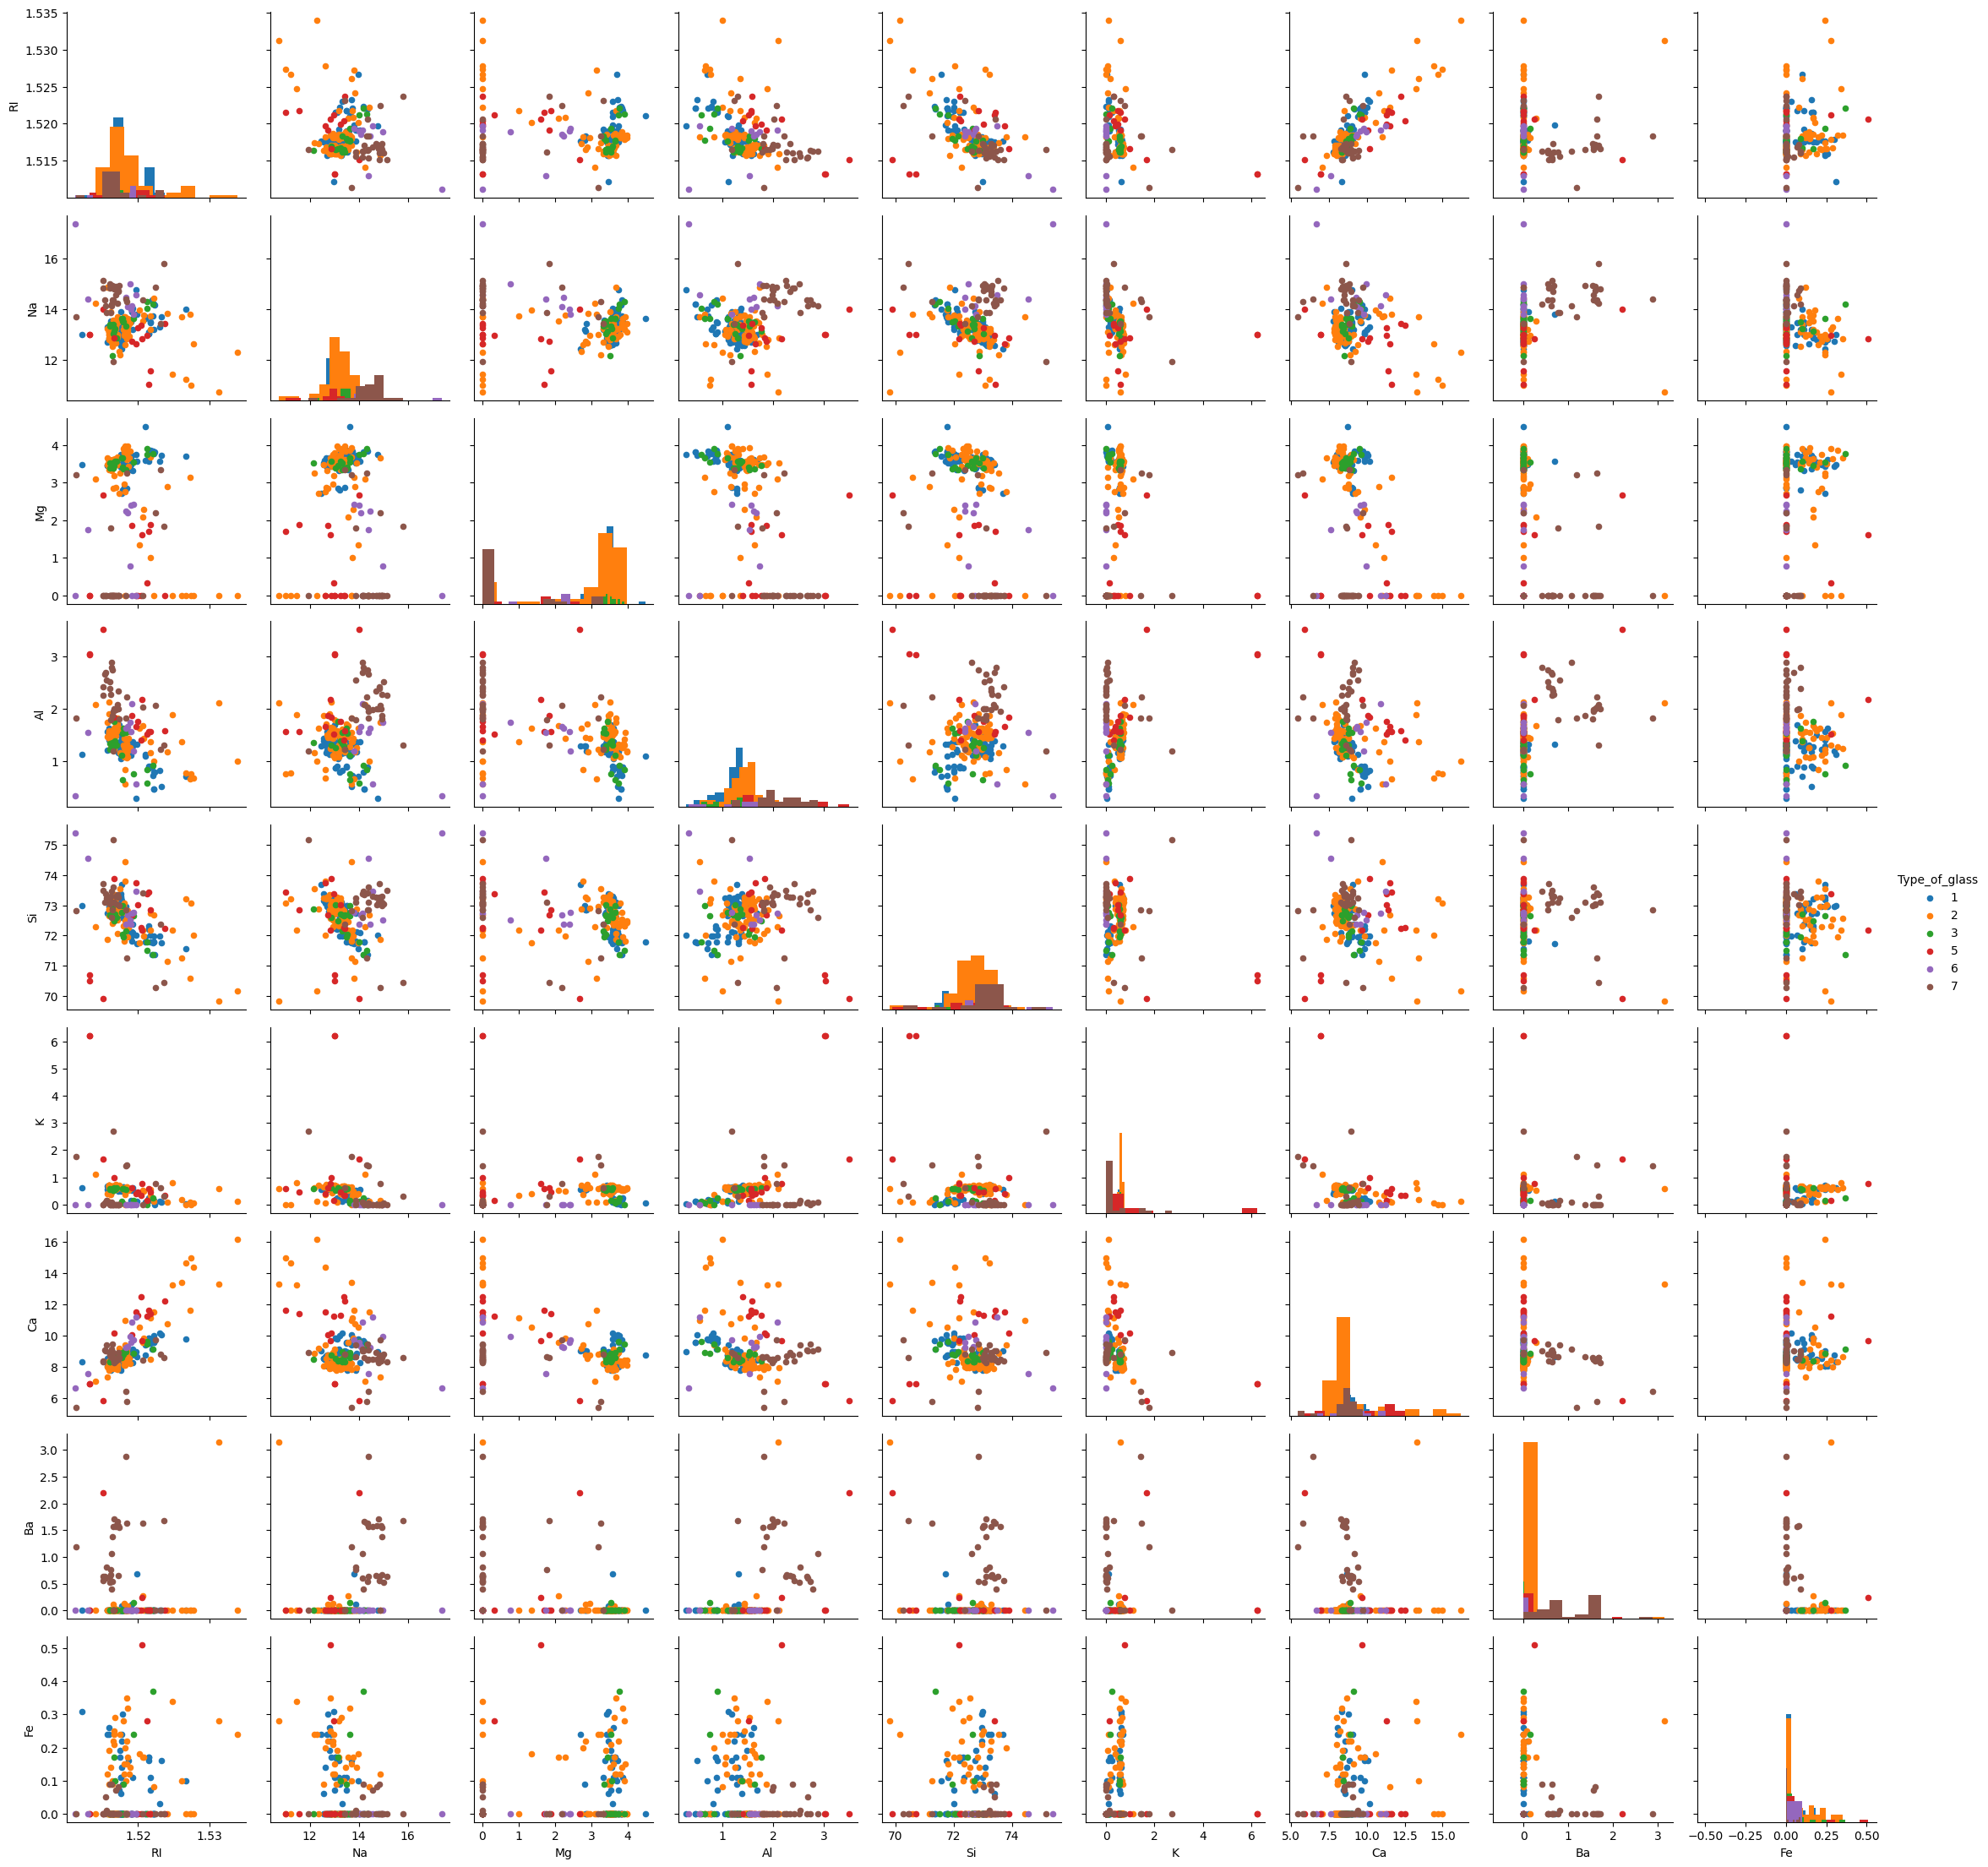

In [43]:
# Rozkład danych - wykres 2
scatter_kws = {'s' : 20}
hist_kws = {'bins' : 10}

graph_glass = sns.PairGrid(data = df_glass, hue = 'Type_of_glass')
graph_glass = graph_glass.map_offdiag(plt.scatter, **scatter_kws)
graph_glass = graph_glass.map_diag(plt.hist, **hist_kws)
graph_glass = graph_glass.add_legend()
plt.show()

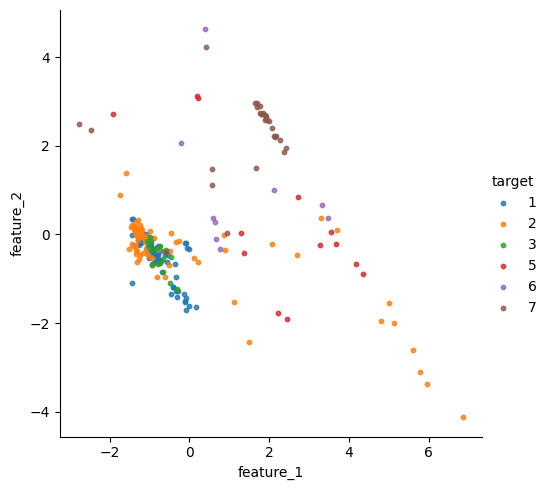

In [74]:
# PCA
X = glass_identification.data.features
y = glass_identification.data.targets
y = [y.values[i][0] for i in range(len(y.values))] # Zmiana wymiaru y

pca = PCA(n_components = 2)
pca_X = pca.fit_transform(X)

df_glass_pca = pd.concat([pd.DataFrame(pca_X, columns = ['feature_1', 'feature_2'])\
                         , pd.DataFrame(y, columns = ['target'])], axis = 1)

# Wykres
sns.lmplot(data = df_glass_pca
           , x = 'feature_1'
           , y = 'feature_2'
           , hue = 'target'
           , fit_reg = False
           , scatter_kws = {'s' : 10}
           )
plt.show()